Project #1


In [1]:
# Import 
import warnings
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
from census import Census
import requests
import hvplot.pandas

#To ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
# Import U.S. Census API Key
from config import api_key

# Create an instance of the Census library
c=Census(
    api_key,
    year = 2022
)

Preparing, Cleaning and Merging Data

In [3]:
# File Path
general_data_to_load = Path("Resources/Hospital_General_Information.csv")
score_data_to_load = Path("Resources/hvbp_tps.csv")
locations_data_to_load=Path("Resources/hospital_locations.csv")

# Read Hospital General, Score, and Location Data File and store into Pandas DataFrames
general_data = pd.read_csv(general_data_to_load, encoding='latin1')
score_data = pd.read_csv(score_data_to_load)
locations_data=pd.read_csv(locations_data_to_load)

# Combine the data from the General and Score files into a single dataset
hospital_data_complete = pd.merge(general_data, score_data, how="left", left_on='Provider ID', right_on="Facility ID")

# Make an output for the new dataset
output_file_path= 'hospital_data_complete.csv'
hospital_data_complete.to_csv(output_file_path, index=False)
hospital_data_complete=pd.read_csv(output_file_path)


hospital_data_complete

,Provider ID,Hospital Name,Address_x,City,State_x,ZIP Code_x,County Name,Phone Number,Hospital Type,Hospital Ownership,...,County/Parish,Unweighted Normalized Clinical Outcomes Domain Score,Weighted Normalized Clinical Outcomes Domain Score,Unweighted Person And Community Engagement Domain Score,Weighted Person And Community Engagement Domain Score,Unweighted Normalized Safety Domain Score,Weighted Safety Domain Score,Unweighted Normalized Efficiency And Cost Reduction Domain Score,Weighted Efficiency And Cost Reduction Domain Score,Total Performance Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,HOUSTON,38.33333333,9.583333333,16,4,8,2,0,0,15.583333
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,MARSHALL,28,7,6,1.5,22,5.5,30,7.5,21.500000
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,LAUDERDALE,0,0,6,1.5,48,12,0,0,13.500000
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,COVINGTON,6.666666667,2.222222222,24,8,Not Available,Not Available,50,16.66666667,26.888889
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,670118,FIRST TEXAS HOSPITAL,9922 LOUETTA RD,HOUSTON,TX,77070,HARRIS,8442641435,Acute Care Hospitals,Proprietary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4808,640001,LBJ TROPICAL MEDICAL CENTER,FAGAALU VILLAGE,PAGO PAGO,AS,96799,NaN,6846334590,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4809,650001,GUAM MEMORIAL HOSPITAL AUTHORITY,85O GOV CARLOS G CAMACHO ROAD,TAMUNING,GU,96913,NaN,6716472552,Acute Care Hospitals,Government - Local,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4810,650003,GUAM REGIONAL MEDICAL CITY,133 ROUTE 3,DEDEDO,GU,96929,NaN,6716455500,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Calculate the number of hospitals and find the column names
hospital_unique_count=hospital_data_complete['Hospital Name'].nunique()
print("Number of unique hospitals:",hospital_unique_count)
#print (hospital_data_complete.columns)

Number of unique hospitals: 4623


In [5]:
# Identify incomplete rows
#hospital_data_complete.count()

In [6]:
#Make a new data frame for Hospital Information and Weighted Value Based Payment Scores

hospital_data_df = pd.DataFrame({
    'Provider ID': hospital_data_complete['Provider ID'],
    'Hospital Name': hospital_data_complete['Hospital Name'],
    'Address': hospital_data_complete['Address_x'],  # Renamed to 'Address'
    'City': hospital_data_complete['City'],
    'State': hospital_data_complete['State_x'],      # Renamed to 'State'
    'ZIP Code': hospital_data_complete['ZIP Code_x'],# Renamed to 'Zip Code'
    'County Name': hospital_data_complete['County Name'],
    'Phone Number': hospital_data_complete['Phone Number'],
    'Hospital Type': hospital_data_complete['Hospital Type'],
    'Hospital Ownership': hospital_data_complete['Hospital Ownership'],
    'Emergency Services': hospital_data_complete['Emergency Services'],
    'Meets criteria for meaningful use of EHRs': hospital_data_complete['Meets criteria for meaningful use of EHRs'],
    'Hospital overall rating': hospital_data_complete['Hospital overall rating'],
    'Weighted Normalized Clinical Outcomes Domain Score': hospital_data_complete['Weighted Normalized Clinical Outcomes Domain Score'],
    'Weighted Person And Community Engagement Domain Score': hospital_data_complete['Weighted Person And Community Engagement Domain Score'],
    'Weighted Safety Domain Score': hospital_data_complete['Weighted Safety Domain Score'],
    'Weighted Efficiency And Cost Reduction Domain Score': hospital_data_complete['Weighted Efficiency And Cost Reduction Domain Score'],
    'Total Performance Score': hospital_data_complete['Total Performance Score']
})

hospital_data_df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Weighted Normalized Clinical Outcomes Domain Score,Weighted Person And Community Engagement Domain Score,Weighted Safety Domain Score,Weighted Efficiency And Cost Reduction Domain Score,Total Performance Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,9.583333333,4,2,0,15.583333
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,7,1.5,5.5,7.5,21.500000
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,0,1.5,12,0,13.500000
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,2.222222222,8,Not Available,16.66666667,26.888889
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop all rows with missing information

# First, drop rows with any NaN values
hospital_data_df = hospital_data_df.dropna(how='any')

# Then, drop rows where 'Not Available' is present in any column
hospital_data_df = hospital_data_df[~hospital_data_df.isin(['Not Available']).any(axis=1)]

columns_to_convert = ['Hospital overall rating',
                      'Weighted Normalized Clinical Outcomes Domain Score',
                      'Weighted Person And Community Engagement Domain Score',
                      'Weighted Safety Domain Score',
                      'Weighted Efficiency And Cost Reduction Domain Score']

new_hospital_data_df = hospital_data_df.copy()  # Copy the original DataFrame

for col in columns_to_convert:

    new_hospital_data_df[col] = new_hospital_data_df[col].astype(float)

# Find the data types for columns
#new_hospital_data_df.info()

new_hospital_data_df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Weighted Normalized Clinical Outcomes Domain Score,Weighted Person And Community Engagement Domain Score,Weighted Safety Domain Score,Weighted Efficiency And Cost Reduction Domain Score,Total Performance Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3.0,9.583333,4.0,2.0,0.0,15.583333
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3.0,7.000000,1.5,5.5,7.5,21.500000
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2.0,0.000000,1.5,12.0,0.0,13.500000
5,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,2058383122,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2.0,3.750000,4.0,4.0,2.5,14.250000
6,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,Yes,Y,3.0,3.125000,3.5,17.5,0.0,24.125000


In [8]:
# Create a data frame with Hosptial General Information and Unweighted Value Based Payment Scores 

hospital_unweighted = pd.DataFrame({
    'Provider ID': hospital_data_complete['Provider ID'],
    'Hospital Name': hospital_data_complete['Hospital Name'],
    'Address': hospital_data_complete['Address_x'],  # Renamed to 'Address'
    'City': hospital_data_complete['City'],
    'State': hospital_data_complete['State_x'],      # Renamed to 'State'
    'ZIP Code': hospital_data_complete['ZIP Code_x'],# Renamed to 'Zip Code'
    'County Name': hospital_data_complete['County Name'],
    'Phone Number': hospital_data_complete['Phone Number'],
    'Hospital Type': hospital_data_complete['Hospital Type'],
    'Hospital Ownership': hospital_data_complete['Hospital Ownership'],
    'Emergency Services': hospital_data_complete['Emergency Services'],
    'Meets criteria for meaningful use of EHRs': hospital_data_complete['Meets criteria for meaningful use of EHRs'],
    'Hospital overall rating': hospital_data_complete['Hospital overall rating'],
    'Unweighted Normalized Clinical Outcomes Domain Score': hospital_data_complete['Unweighted Normalized Clinical Outcomes Domain Score'],
    'Unweighted Person And Community Engagement Domain Score': hospital_data_complete['Unweighted Person And Community Engagement Domain Score'],
    'Unweighted Normalized Safety Domain Score': hospital_data_complete['Unweighted Normalized Safety Domain Score'],
    'Unweighted Normalized Efficiency And Cost Reduction Domain Score': hospital_data_complete['Unweighted Normalized Efficiency And Cost Reduction Domain Score'],
    'Total Performance Score': hospital_data_complete['Total Performance Score']
})

hospital_unweighted.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Unweighted Normalized Clinical Outcomes Domain Score,Unweighted Person And Community Engagement Domain Score,Unweighted Normalized Safety Domain Score,Unweighted Normalized Efficiency And Cost Reduction Domain Score,Total Performance Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,38.33333333,16,8,0,15.583333
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,28,6,22,30,21.500000
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,0,6,48,0,13.500000
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2,6.666666667,24,Not Available,50,26.888889
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,NaN,NaN,NaN,NaN


In [9]:
# First, drop rows with any NaN values
hospital_unweighted = hospital_unweighted.dropna(how='any')

# Then, drop rows where 'Not Available' is present in any column
hospital_unweighted = hospital_unweighted[~hospital_unweighted.isin(['Not Available']).any(axis=1)]

columns_to_convert = ['Hospital overall rating',
                      'Unweighted Normalized Clinical Outcomes Domain Score',
                      'Unweighted Person And Community Engagement Domain Score',
                      'Unweighted Normalized Safety Domain Score',
                      'Unweighted Normalized Efficiency And Cost Reduction Domain Score']

new_hospital_unweighted = hospital_unweighted.copy()  # Copy the original DataFrame

for col in columns_to_convert:

    new_hospital_unweighted[col] = new_hospital_unweighted[col].astype(float)


new_hospital_unweighted.head()


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Unweighted Normalized Clinical Outcomes Domain Score,Unweighted Person And Community Engagement Domain Score,Unweighted Normalized Safety Domain Score,Unweighted Normalized Efficiency And Cost Reduction Domain Score,Total Performance Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3.0,38.333333,16.0,8.0,0.0,15.583333
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3.0,28.000000,6.0,22.0,30.0,21.500000
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2.0,0.000000,6.0,48.0,0.0,13.500000
5,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,2058383122,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,2.0,15.000000,16.0,16.0,10.0,14.250000
6,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,Yes,Y,3.0,12.500000,14.0,70.0,0.0,24.125000


State Analysis of Hospital CMS Value Based Payment Scores

In [10]:
#Find Counts of Weighted Scores by State

rating_by_state_count = new_hospital_data_df.groupby('State')['Hospital overall rating'].count()
clinical_by_state_count = new_hospital_data_df.groupby('State')['Weighted Normalized Clinical Outcomes Domain Score'].count()
person_score_by_state_count = new_hospital_data_df.groupby('State')['Weighted Person And Community Engagement Domain Score'].count()
safety_by_state_count = new_hospital_data_df.groupby('State')['Weighted Safety Domain Score'].count()
efficiency_by_state_count = new_hospital_data_df.groupby('State')['Weighted Efficiency And Cost Reduction Domain Score'].count()
performance_total_by_state_count = new_hospital_data_df.groupby('State')['Total Performance Score'].count()

by_state_df_count=pd.DataFrame({'Hospital Rate Count':rating_by_state_count,'Weighted Normalized Clinical Outcomes Domain Score Count':clinical_by_state_count,
                          'Weighted Person And Community Engagement Domain Score Count':person_score_by_state_count, 'Weighted Safety Domain Score Count':safety_by_state_count,
                          'Weighted Efficiency And Cost Reduction Domain Score Count':efficiency_by_state_count, 
                          'Total Performance Score Count':performance_total_by_state_count})

by_state_df_count.head()

,Hospital Rate Count,Weighted Normalized Clinical Outcomes Domain Score Count,Weighted Person And Community Engagement Domain Score Count,Weighted Safety Domain Score Count,Weighted Efficiency And Cost Reduction Domain Score Count,Total Performance Score Count
State,,,,,,
AK,5,5,5,5,5,5
AL,39,39,39,39,39,39
AR,23,23,23,23,23,23
AZ,41,41,41,41,41,41
CA,194,194,194,194,194,194


In [11]:
#Find Avergages of Weighted Scores by State
rating_by_state = new_hospital_data_df.groupby('State')['Hospital overall rating'].mean()
clinical_by_state = new_hospital_data_df.groupby('State')['Weighted Normalized Clinical Outcomes Domain Score'].mean()
person_score_by_state = new_hospital_data_df.groupby('State')['Weighted Person And Community Engagement Domain Score'].mean()
safety_by_state = new_hospital_data_df.groupby('State')['Weighted Safety Domain Score'].mean()
efficiency_by_state = new_hospital_data_df.groupby('State')['Weighted Efficiency And Cost Reduction Domain Score'].mean()
performance_total_by_state = new_hospital_data_df.groupby('State')['Total Performance Score'].mean()

by_state_df=pd.DataFrame({'Hospital Rate Average':rating_by_state,'Weighted Normalized Clinical Outcomes Domain Score Avg':clinical_by_state,
                          'Weighted Person And Community Engagement Domain Score Avg':person_score_by_state, 'Weighted Safety Domain Score Avg':safety_by_state,
                          'Weighted Efficiency And Cost Reduction Domain Score Avg':efficiency_by_state, 
                          'Total Performance Score Avg':performance_total_by_state})

by_state_df.head()

,Hospital Rate Average,Weighted Normalized Clinical Outcomes Domain Score Avg,Weighted Person And Community Engagement Domain Score Avg,Weighted Safety Domain Score Avg,Weighted Efficiency And Cost Reduction Domain Score Avg,Total Performance Score Avg
State,,,,,,
AK,2.800000,4.450000,4.650000,11.566667,17.500000,38.166667
AL,2.820513,3.475427,4.525641,8.787393,4.166667,20.955128
AR,2.521739,4.961957,3.358696,9.181159,0.108696,17.610507
AZ,2.975610,5.130081,2.530488,7.914634,4.024390,19.599593
CA,2.840206,6.242698,2.746134,8.344287,4.072165,21.405284


In [12]:
# Sort the states by average Total Performance Score in descending order and display the top 10 rows.
top_states =by_state_df.sort_values(["Total Performance Score Avg"], ascending=False) 
#top_states.head(10)

In [13]:
# Sort the states by average Total Performance Score in ascending order and display the top 10 rows.
lowest_states =by_state_df.sort_values(["Total Performance Score Avg"], ascending=True) 
#lowest_states.head(10)

Comparison of Total Score by State and Total Count of Hospitals Scored

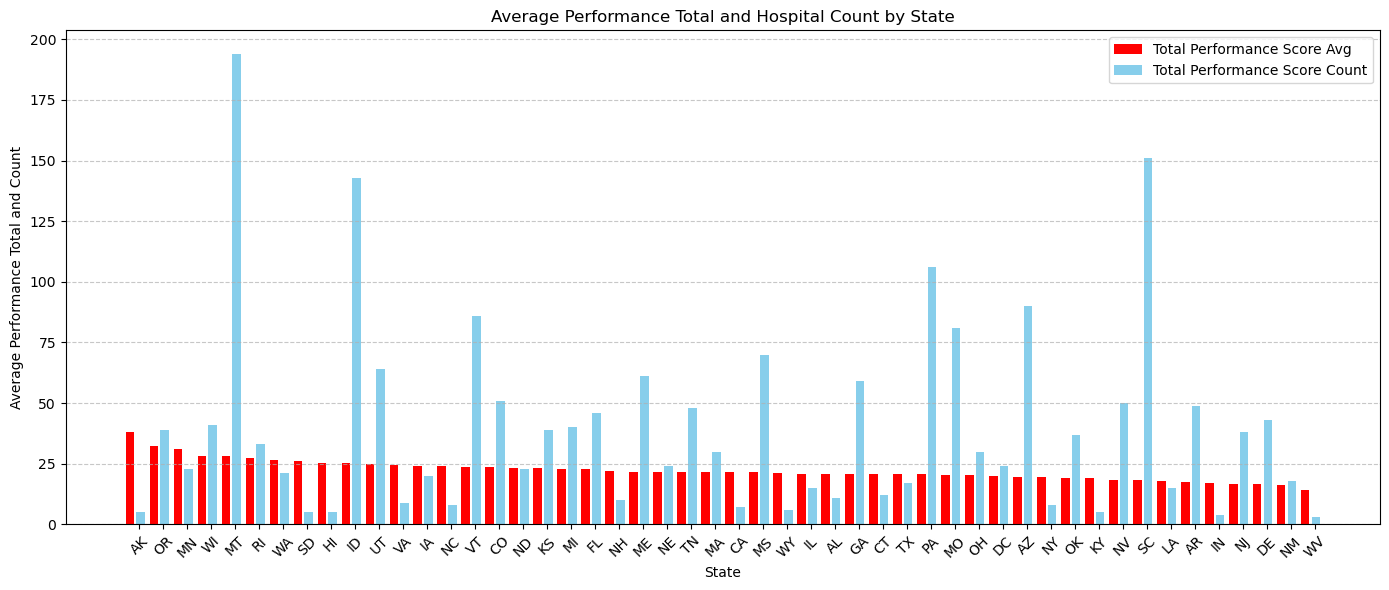

In [14]:

bar_width = 0.35

# Center positions for each group of bars
x = range(len(top_states.index))

# Plotting
plt.figure(figsize=(14, 6))

# Plot the first set of bars
plt.bar(x, top_states['Total Performance Score Avg'], width=bar_width, color='red', label='Total Performance Score Avg')

# Plot the second set of bars next to the first one
plt.bar([i + bar_width + 0.1 for i in x], by_state_df_count['Total Performance Score Count'], width=bar_width, color='skyblue', label='Total Performance Score Count')

plt.title('Average Performance Total and Hospital Count by State')
plt.xlabel('State')
plt.ylabel('Average Performance Total and Count')
plt.xticks([i + bar_width + 0.05 for i in x], top_states.index, rotation=45)  # Adjust tick mark positions
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig("fig_1.png")
plt.show()

Correlation Between Metrics and Total Performance Score

In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Annotate the line equation on the plot
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")

    #Include Title with R-Value in title
    title_with_r = f"{title}\nR = {round(rvalue, 2)}"
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title_with_r)
    
    # Show legend
    plt.legend()

    # Show plot
    plt.show()

#Weighted Normalized Clinical Outcomes Domain Score	Weighted Person And Community Engagement Domain Score	Weighted Safety Domain Score Weighted Efficiency And Cost Reduction Domain Score	Total Performance Score

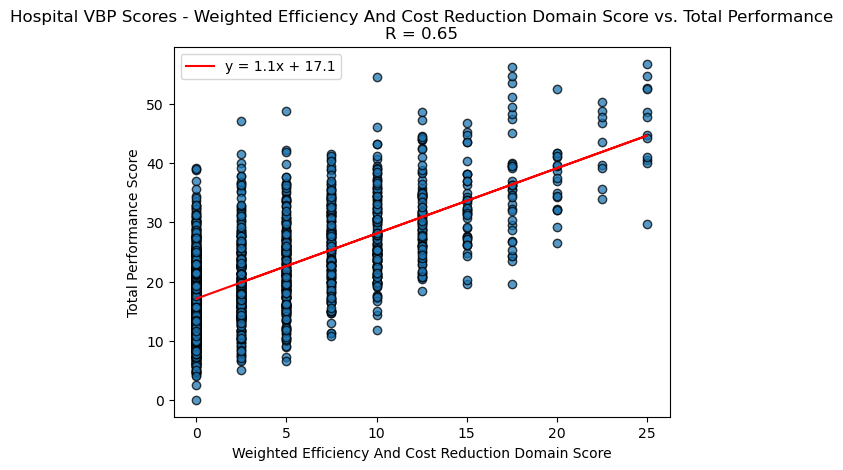

<Figure size 640x480 with 0 Axes>

In [16]:
# Linear regression 

plot_linear_regression(new_hospital_data_df['Weighted Efficiency And Cost Reduction Domain Score'], new_hospital_data_df['Total Performance Score'], 
                       'Weighted Efficiency And Cost Reduction Domain Score', 
                       'Total Performance Score', 
                       'Hospital VBP Scores - Weighted Efficiency And Cost Reduction Domain Score vs. Total Performance', (10, 270))


plt.savefig("Output/fig_2.png")
plt.show()

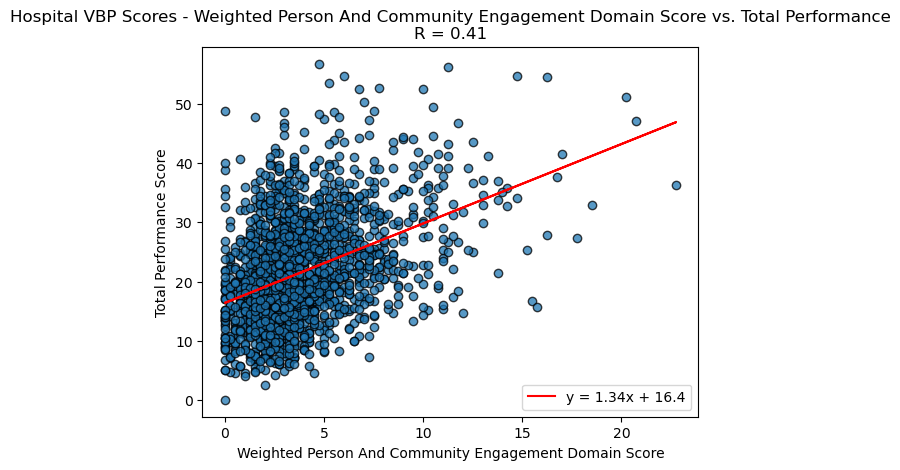

<Figure size 640x480 with 0 Axes>

In [17]:
# Linear regression 

plot_linear_regression(new_hospital_data_df['Weighted Person And Community Engagement Domain Score'], new_hospital_data_df['Total Performance Score'], 
                       'Weighted Person And Community Engagement Domain Score', 
                       'Total Performance Score', 
                       'Hospital VBP Scores - Weighted Person And Community Engagement Domain Score vs. Total Performance', (10, 270))

plt.savefig("fig_3.png")
plt.show()

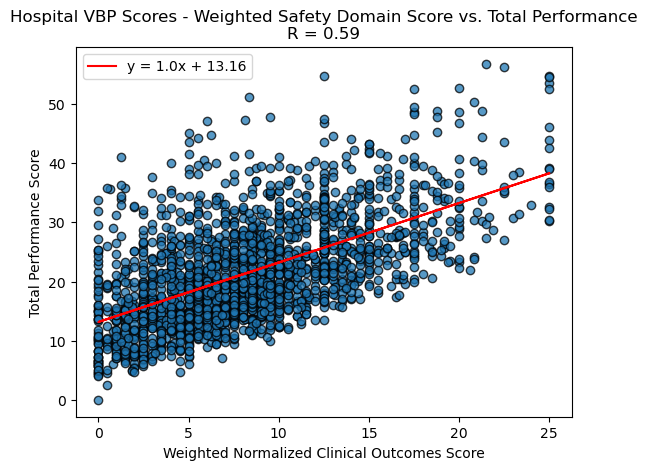

<Figure size 640x480 with 0 Axes>

In [18]:
# Linear regression 

plot_linear_regression(new_hospital_data_df['Weighted Safety Domain Score'], new_hospital_data_df['Total Performance Score'], 
                       'Weighted Normalized Clinical Outcomes Score', 
                       'Total Performance Score', 
                       'Hospital VBP Scores - Weighted Safety Domain Score vs. Total Performance', (10, 270))
plt.savefig("fig_4.png")
plt.show()

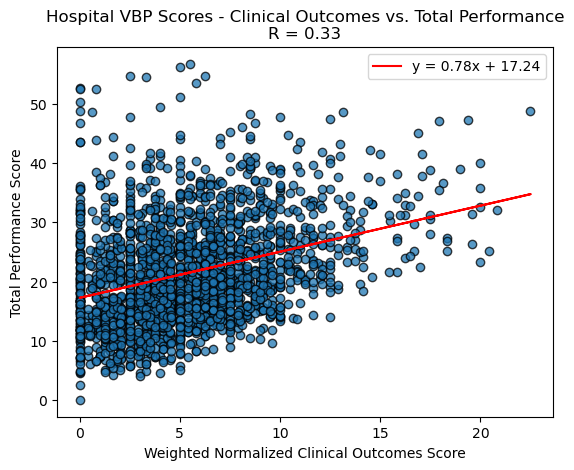

<Figure size 640x480 with 0 Axes>

In [19]:
# Linear regression 

plot_linear_regression(new_hospital_data_df['Weighted Normalized Clinical Outcomes Domain Score'], new_hospital_data_df['Total Performance Score'], 
                       'Weighted Normalized Clinical Outcomes Score', 
                       'Total Performance Score', 
                       'Hospital VBP Scores - Clinical Outcomes vs. Total Performance', (10, 270))
plt.savefig("fig_5.png")
plt.show()

Correlation Between Patient Surveys and Other Value Based Payment Metrics

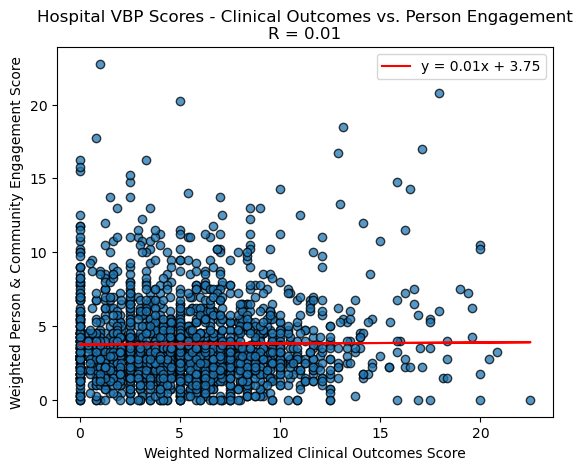

<Figure size 640x480 with 0 Axes>

In [20]:
# Linear regression 

plot_linear_regression(new_hospital_data_df['Weighted Normalized Clinical Outcomes Domain Score'], new_hospital_data_df['Weighted Person And Community Engagement Domain Score'], 
                       'Weighted Normalized Clinical Outcomes Score', 
                       'Weighted Person & Community Engagement Score', 
                       'Hospital VBP Scores - Clinical Outcomes vs. Person Engagement', (10, 270))
plt.savefig("fig_6.png")
plt.show()


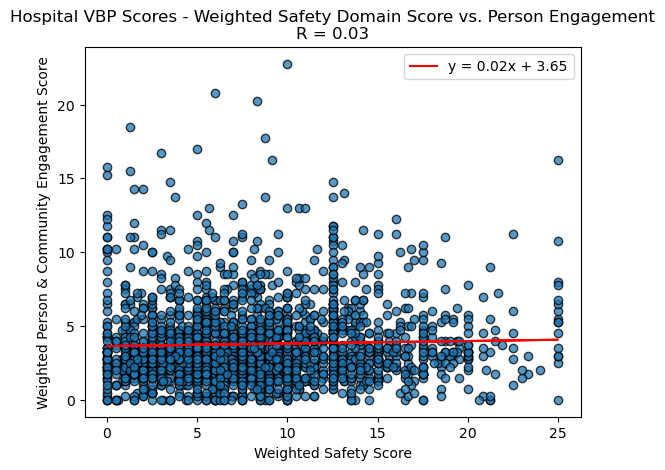

<Figure size 640x480 with 0 Axes>

In [21]:
plot_linear_regression(new_hospital_data_df['Weighted Safety Domain Score'], new_hospital_data_df['Weighted Person And Community Engagement Domain Score'], 
                       'Weighted Safety Score', 
                       'Weighted Person & Community Engagement Score', 
                       'Hospital VBP Scores - Weighted Safety Domain Score vs. Person Engagement', (10, 270))
plt.savefig("fig_7.png")
plt.show()

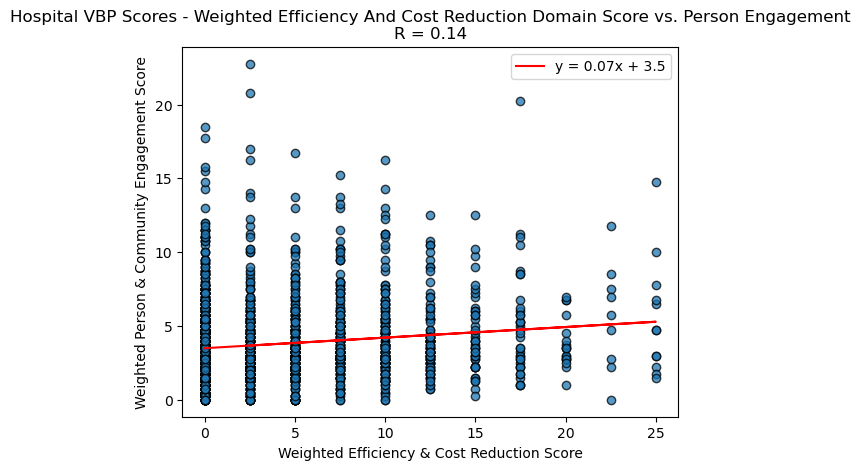

<Figure size 640x480 with 0 Axes>

In [22]:
plot_linear_regression(new_hospital_data_df['Weighted Efficiency And Cost Reduction Domain Score'], new_hospital_data_df['Weighted Person And Community Engagement Domain Score'], 
                       'Weighted Efficiency & Cost Reduction Score', 
                       'Weighted Person & Community Engagement Score', 
                       'Hospital VBP Scores - Weighted Efficiency And Cost Reduction Domain Score vs. Person Engagement', (10, 270))
plt.savefig("fig_8.png")
plt.show()

Analysis of Hospital Ownership Types

In [23]:
print(new_hospital_data_df['Hospital Ownership'].value_counts())


Hospital Ownership
Voluntary non-profit - Private                 962
Proprietary                                    371
Voluntary non-profit - Other                   214
Voluntary non-profit - Church                  205
Government - Hospital District or Authority    138
Government - Local                              82
Government - State                              33
Government - Federal                             6
Physician                                        6
Name: count, dtype: int64


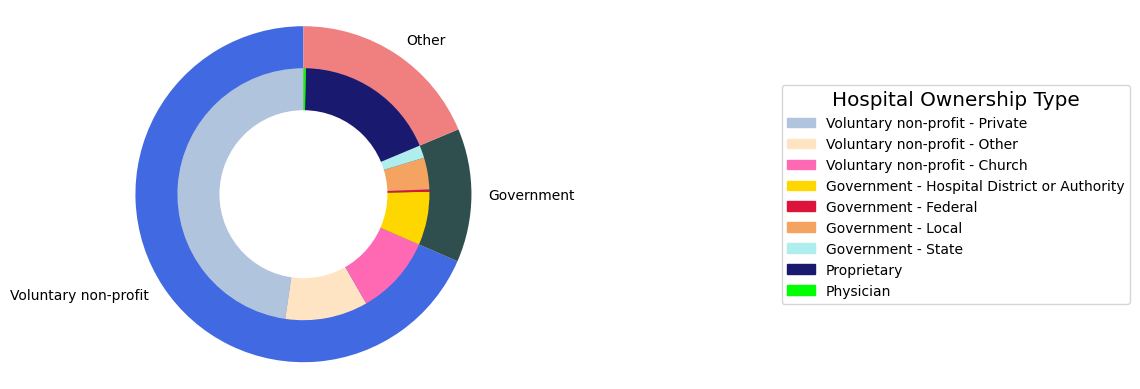

In [24]:
# Data to plot
labels = ['Voluntary non-profit', 'Government', 'Other']
sizes = [1381, 259, 377]
labels_ownership = ['Voluntary non-profit - Private', 'Voluntary non-profit - Other','Voluntary non-profit - Church',
                         'Government - Hospital District or Authority','Government - Federal','Government - Local','Government - State','Proprietary','Physician']
sizes_ownership = [962, 214, 205, 138, 6, 82, 33, 371, 6]
colors = ['royalblue', 'darkslategray', 'lightcoral']
colors_ownership = ['lightsteelblue', 'bisque', 'hotpink', 'gold', 'crimson', 'sandybrown', 'paleturquoise', 'midnightblue', 'lime']

# Plot
fig, ax = plt.subplots()
wedges, _ = ax.pie(sizes, labels=labels, colors=colors, startangle=90, frame=True)
wedges_ownership, _ = ax.pie(sizes_ownership, colors=colors_ownership, radius=0.75, startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig.gca().add_artist(centre_circle)

# Custom legend
legend_labels = labels_ownership
legend_colors = colors_ownership
legend = ax.legend(legend_labels, loc="center left", bbox_to_anchor=(1.45, 0.5), title='Hospital Ownership Type', title_fontsize='medium')

# Set legend colors to match chart colors
for handle, color in zip(legend.legendHandles, legend_colors):
    handle.set_color(color)

# Title on top of the legend
legend_title = legend.get_title()
legend_title.set_fontsize('x-large')

plt.axis('equal')
plt.tight_layout()
plt.savefig("fig_9.png")
plt.show()


Average Performance Metrics by Hospital Ownership Type

In [25]:

performance_ownership_mean = new_hospital_data_df.groupby('Hospital Ownership')["Total Performance Score"].mean()
clinical_ownership_mean = new_hospital_data_df.groupby('Hospital Ownership')['Weighted Normalized Clinical Outcomes Domain Score'].mean()
person_ownership_mean = new_hospital_data_df.groupby('Hospital Ownership')["Weighted Person And Community Engagement Domain Score"].mean()
safety_ownership_mean = new_hospital_data_df.groupby('Hospital Ownership')["Weighted Safety Domain Score"].mean()
efficiency_ownership_mean = new_hospital_data_df.groupby('Hospital Ownership')["Weighted Efficiency And Cost Reduction Domain Score"].mean()

hospital_by_ownership=pd.DataFrame({'Weighted Normalized Clinical Outcomes Domain Score Avg':clinical_ownership_mean,
                          'Weighted Person And Community Engagement Domain Score Avg':person_ownership_mean, 'Weighted Safety Domain Score Avg':safety_ownership_mean,
                          'Weighted Efficiency And Cost Reduction Domain Score Avg':efficiency_ownership_mean, 
                          'Total Performance Score Avg':performance_ownership_mean})

hospital_by_ownership

,Weighted Normalized Clinical Outcomes Domain Score Avg,Weighted Person And Community Engagement Domain Score Avg,Weighted Safety Domain Score Avg,Weighted Efficiency And Cost Reduction Domain Score Avg,Total Performance Score Avg
Hospital Ownership,,,,,
Government - Federal,5.305556,3.333333,8.736111,9.583333,26.958333
Government - Hospital District or Authority,4.135568,4.311594,8.331522,3.876812,20.655495
Government - Local,3.939024,3.923780,7.754573,4.390244,20.007622
Government - State,6.060606,4.325758,5.295455,3.560606,19.242424
Physician,3.020833,6.833333,11.020833,1.666667,22.541667
Proprietary,5.272350,2.994609,9.787848,2.823450,20.878257
Voluntary non-profit - Church,5.489024,3.759756,7.968902,4.121951,21.339634
Voluntary non-profit - Other,5.827687,3.837617,8.208917,4.988318,22.862539
Voluntary non-profit - Private,5.713401,3.967775,7.891026,4.132017,21.704219


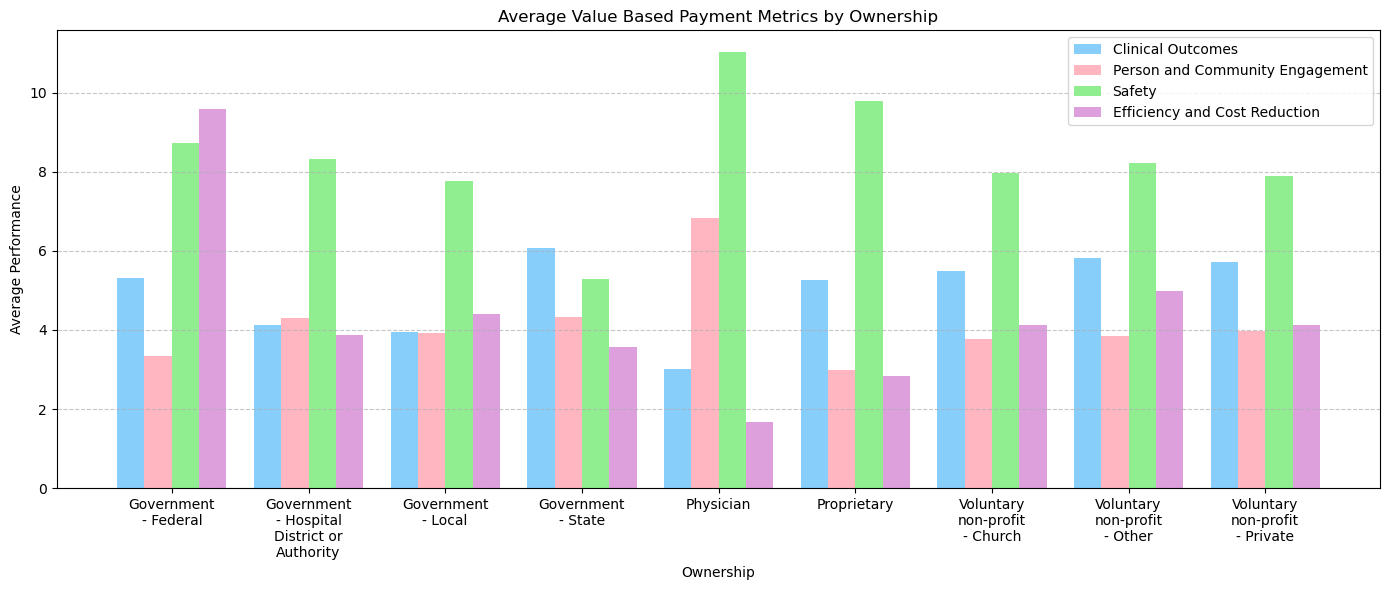

In [26]:
bar_width = 0.20

# Center positions for each group of bars
x = range(len(hospital_by_ownership))

# Plotting
plt.figure(figsize=(14, 6))

# Plot the first set of bars
plt.bar([i - 1.5 * bar_width for i in x], hospital_by_ownership['Weighted Normalized Clinical Outcomes Domain Score Avg'], width=bar_width, color='lightskyblue', label='Clinical Outcomes')

# Plot the second set of bars next to the first one
plt.bar([i - 0.5 * bar_width for i in x], hospital_by_ownership['Weighted Person And Community Engagement Domain Score Avg'], width=bar_width, color='lightpink', label='Person and Community Engagement')

# Plot the third set of bars next to the second one
plt.bar([i + 0.5 * bar_width for i in x], hospital_by_ownership['Weighted Safety Domain Score Avg'], width=bar_width, color='lightgreen', label='Safety')

# Plot the fourth set of bars next to the third one
plt.bar([i + 1.5 * bar_width for i in x], hospital_by_ownership['Weighted Efficiency And Cost Reduction Domain Score Avg'], width=bar_width, color='plum', label='Efficiency and Cost Reduction')

from textwrap import wrap

# Custom tick label formatter to wrap the labels
def wrap_labels(labels, width=11):
    wrapped_labels = ['\n'.join(wrap(label, width)) for label in labels]
    return wrapped_labels

# Assuming x is defined as the center positions for each group of bars

# Wrapping tick labels
wrapped_labels = wrap_labels(hospital_by_ownership.index, width=11)
plt.xticks(x, wrapped_labels)

plt.title('Average Value Based Payment Metrics by Ownership')
plt.xlabel('Ownership')
plt.ylabel('Average Performance')
#plt.xticks([i for i in x], hospital_by_ownership.index, rotation=80)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig("fig_10.png")
plt.show()

Comparison of Census Data and Hospital Value Based Payment Metrics 

In [27]:
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E"
    ),
    {'for': 'zip code tabulation area:*'}
)

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column renaming
census_pd = census_pd.rename(
    columns = {
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "NAME": "Name",
        "zip code tabulation area": "Zipcode"
    }
)

# Add a Poverty Rate column (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Configure the final DataFrame
census_pd = census_pd[
    [
        "Zipcode",
        "Population",
        "Median Age",
        "Household Income",
        "Per Capita Income",
        "Poverty Count",
        "Poverty Rate"
    ]
]

census_pd['Zipcode'] = census_pd['Zipcode'].astype(int)
# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd.head()

Number of rows in the DataFrame: 33774


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,601,16834.0,44.0,17526.0,9012.0,10440.0,62.017346
1,602,37642.0,45.2,20260.0,11379.0,17768.0,47.202593
2,603,49075.0,45.0,17703.0,13010.0,23551.0,47.989812
3,606,5590.0,46.2,19603.0,9274.0,3021.0,54.042934
4,610,25542.0,44.4,22796.0,12726.0,11597.0,45.403649


In [28]:
hospital_census_df=pd.merge(new_hospital_data_df, census_pd, how="left", left_on='ZIP Code', right_on="Zipcode")

# Make an output for the new dataset
#output_file_path= 'hospital_data_complete.csv'
#hospital_data_complete.to_csv(output_file_path, index=False)
#hospital_data_complete=pd.read_csv(output_file_path)

hospital_census_df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Weighted Safety Domain Score,Weighted Efficiency And Cost Reduction Domain Score,Total Performance Score,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,2.0,0.0,15.583333,36301.0,38101.0,39.4,47414.0,28880.0,8279.0,21.729088
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,5.5,7.5,21.500000,35957.0,16269.0,36.4,46799.0,23239.0,3174.0,19.509497
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,12.0,0.0,13.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,2058383122,Acute Care Hospitals,Voluntary non-profit - Private,...,4.0,2.5,14.250000,35235.0,20043.0,37.5,59476.0,31057.0,3836.0,19.138851
4,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,17.5,0.0,24.125000,35968.0,4870.0,39.6,54766.0,23024.0,835.0,17.145791


In [29]:
#hospital_census_df.count()

In [30]:
# First, drop rows with any NaN values
hospital_census_df = hospital_census_df.dropna(how='any')

hospital_census_df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Weighted Safety Domain Score,Weighted Efficiency And Cost Reduction Domain Score,Total Performance Score,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,2.0,0.0,15.583333,36301.0,38101.0,39.4,47414.0,28880.0,8279.0,21.729088
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,5.5,7.5,21.500000,35957.0,16269.0,36.4,46799.0,23239.0,3174.0,19.509497
3,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,2058383122,Acute Care Hospitals,Voluntary non-profit - Private,...,4.0,2.5,14.250000,35235.0,20043.0,37.5,59476.0,31057.0,3836.0,19.138851
4,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,17.5,0.0,24.125000,35968.0,4870.0,39.6,54766.0,23024.0,835.0,17.145791
5,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,SHELBY,2056208100,Acute Care Hospitals,Voluntary non-profit - Private,...,8.5,0.0,17.333333,35007.0,27052.0,39.7,81351.0,37693.0,1778.0,6.572527


Correlation Between Census Data and Hospital Total Performance Scores

In [31]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Annotate the line equation on the plot
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")

    #Include Title with R-Value in title
    title_with_r = f"{title}\nR = {round(rvalue, 2)}"
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title_with_r)
    
    # Show legend
    plt.legend()

    # Show plot
    plt.show()

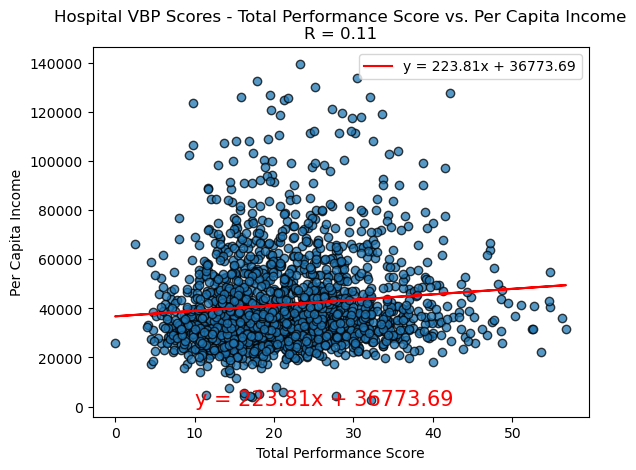

<Figure size 640x480 with 0 Axes>

In [32]:
plot_linear_regression(hospital_census_df['Total Performance Score'], hospital_census_df['Per Capita Income'], 
                       'Total Performance Score', 
                       'Per Capita Income', 
                       'Hospital VBP Scores - Total Performance Score vs. Per Capita Income', (10, 270))
plt.savefig("fig_11.png")
plt.show()

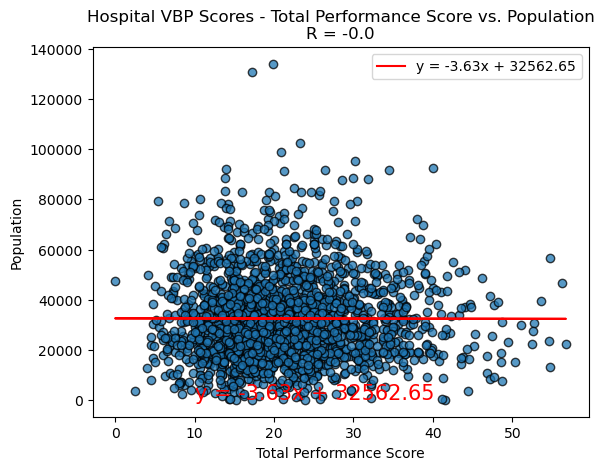

<Figure size 640x480 with 0 Axes>

In [33]:
plot_linear_regression(hospital_census_df['Total Performance Score'], hospital_census_df['Population'], 
                       'Total Performance Score', 
                       'Population', 
                       'Hospital VBP Scores - Total Performance Score vs. Population', (10, 270))
plt.savefig("fig_12.png")
plt.show()

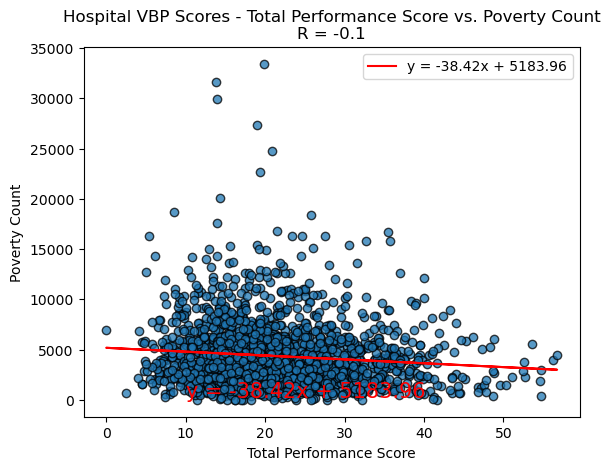

<Figure size 640x480 with 0 Axes>

In [34]:
plot_linear_regression(hospital_census_df['Total Performance Score'], hospital_census_df['Poverty Count'], 
                       'Total Performance Score', 
                       'Poverty Count', 
                       'Hospital VBP Scores - Total Performance Score vs. Poverty Count', (10, 270))
plt.savefig("fig_13.png")
plt.show()

Locating Hospitals with the Highest Total Performance Scores

In [35]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_hospitals =hospital_census_df.sort_values(["Total Performance Score"], ascending=False) 
top_hospitals.head(10)


#locations_data
#hospital_census_df=pd.merge(hospital_census_data_df, census_pd, how="left", left_on='ZIP Code', right_on="Zipcode")

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Weighted Safety Domain Score,Weighted Efficiency And Cost Reduction Domain Score,Total Performance Score,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
1496,380050,SKY LAKES MEDICAL CENTER,2865 DAGGETT AVENUE,KLAMATH FALLS,OR,97601,KLAMATH,5412746150,Acute Care Hospitals,Voluntary non-profit - Private,...,21.500000,25.0,56.750000,97601.0,22302.0,40.2,52951.0,31435.0,4498.0,20.168595
925,230072,HOLLAND COMMUNITY HOSPITAL,602 MICHIGAN AVE,HOLLAND,MI,49423,OTTAWA,6163925141,Acute Care Hospitals,Voluntary non-profit - Private,...,22.500000,17.5,56.250000,49423.0,46467.0,35.2,75164.0,35952.0,4000.0,8.608260
1018,250167,METHODIST HEALTHCARE - OLIVE BRANCH HOSPITAL,4250 BETHEL ROAD,OLIVE BRANCH,MS,38654,DESOTO,6629329000,Acute Care Hospitals,Voluntary non-profit - Private,...,25.000000,17.5,54.750000,38654.0,56449.0,38.8,96145.0,40702.0,2939.0,5.206470
960,230259,ST JOSEPH MERCY CHELSEA,775 S MAIN ST,CHELSEA,MI,48118,WASHTENAW,7344753911,Acute Care Hospitals,Voluntary non-profit - Private,...,12.500000,25.0,54.750000,48118.0,13001.0,49.1,89125.0,54661.0,355.0,2.730559
1777,450604,HILL COUNTRY MEMORIAL HOSPITAL INC,1020 SOUTH STATE HIGHWAY 16,FREDERICKSBURG,TX,78624,GILLESPIE,8309974353,Acute Care Hospitals,Voluntary non-profit - Private,...,25.000000,10.0,54.583333,78624.0,23538.0,49.8,71082.0,43152.0,1910.0,8.114538
587,130014,WEST VALLEY MEDICAL CENTER,1717 ARLINGTON STREET,CALDWELL,ID,83605,CANYON,2084594641,Acute Care Hospitals,Proprietary,...,25.000000,17.5,53.583333,83605.0,39636.0,31.5,58952.0,22059.0,5545.0,13.989807
40,20006,MAT-SU REGIONAL MEDICAL CENTER,2500 SOUTH WOODWORTH LOOP,PALMER,AK,99645,MATANUSKA SUSITNA,9078616000,Acute Care Hospitals,Voluntary non-profit - Private,...,20.000000,25.0,52.750000,99645.0,30849.0,35.8,93242.0,40987.0,2324.0,7.533469
1951,520002,MINISTRY ST MICHAELS HOSPITAL OF STEVENS POINT,900 ILLINOIS AVE,STEVENS POINT,WI,54481,PORTAGE,7153465000,Acute Care Hospitals,Voluntary non-profit - Church,...,25.000000,20.0,52.583333,54481.0,27544.0,30.7,55922.0,31552.0,3791.0,13.763433
928,230081,MUNSON HEALTHCARE CADILLAC HOSPITAL,400 HOBART ST,CADILLAC,MI,49601,WEXFORD,2318767200,Acute Care Hospitals,Voluntary non-profit - Church,...,17.500000,25.0,52.500000,49601.0,22300.0,43.1,61186.0,31643.0,2848.0,12.771300
1491,380022,SAMARITAN ALBANY GENERAL HOSPITAL,1046 6TH AVENUE SW,ALBANY,OR,97321,LINN,5418124000,Acute Care Hospitals,Voluntary non-profit - Church,...,8.333333,17.5,51.083333,97321.0,29970.0,40.6,93617.0,41274.0,2321.0,7.744411


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
top_twenty_five_df=hospital_census_df.loc[hospital_census_df["Total Performance Score"] >45]
# Display sample data
top_twenty_five_df.head()


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Weighted Safety Domain Score,Weighted Efficiency And Cost Reduction Domain Score,Total Performance Score,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
33,10130,ST VINCENT'S ST CLAIR,7063 VETERANS PARKWAY,PELL CITY,AL,35125,SAINT CLAIR,2053383301,Acute Care Hospitals,Voluntary non-profit - Private,...,12.50,22.5,46.750000,35125.0,10759.0,36.5,61865.0,29082.0,1297.0,12.055024
40,20006,MAT-SU REGIONAL MEDICAL CENTER,2500 SOUTH WOODWORTH LOOP,PALMER,AK,99645,MATANUSKA SUSITNA,9078616000,Acute Care Hospitals,Voluntary non-profit - Private,...,20.00,25.0,52.750000,99645.0,30849.0,35.8,93242.0,40987.0,2324.0,7.533469
74,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,MARICOPA,4803424201,Acute Care Hospitals,Voluntary non-profit - Private,...,6.00,2.5,47.166667,85054.0,8394.0,37.8,85656.0,63847.0,1148.0,13.676436
162,50135,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVE,HOLLYWOOD,CA,90028,LOS ANGELES,3234622271,Acute Care Hospitals,Proprietary,...,21.25,5.0,48.750000,90028.0,30982.0,36.5,57258.0,47369.0,6020.0,19.430637
308,60012,CENTURA HEALTH-ST MARY CORWIN MEDICAL CENTER,1008 MINNEQUA AVE,PUEBLO,CO,81004,PUEBLO,7195574000,Acute Care Hospitals,Voluntary non-profit - Church,...,18.75,15.0,45.250000,81004.0,26261.0,38.2,46827.0,25749.0,5881.0,22.394425


In [43]:
locations_data
top_twenty_five_location=pd.merge(top_twenty_five_df, locations_data, how="left", left_on='Hospital Name', right_on="NAME")
#top_ten_location.info()

top_twenty_five_final=top_twenty_five_location[['Hospital Name', 'State', 'Total Performance Score', 'LATITUDE', 'LONGITUDE']].copy()

# First, drop rows with any NaN values
top_twenty_five_final = top_twenty_five_final.dropna(how='any')

top_twenty_five_final.sort_values(["Total Performance Score"],ascending=False)


,Hospital Name,State,Total Performance Score,LATITUDE,LONGITUDE
21,SKY LAKES MEDICAL CENTER,OR,56.750000,42.253161,-121.785191
11,HOLLAND COMMUNITY HOSPITAL,MI,56.250000,42.774900,-86.114039
14,ST JOSEPH MERCY CHELSEA,MI,54.750000,42.310261,-84.015834
6,WEST VALLEY MEDICAL CENTER,ID,53.583333,43.654328,-116.694276
1,MAT-SU REGIONAL MEDICAL CENTER,AK,52.750000,61.562894,-149.258311
12,MUNSON HEALTHCARE CADILLAC HOSPITAL,MI,52.500000,44.245448,-85.389295
20,SAMARITAN ALBANY GENERAL HOSPITAL,OR,51.083333,44.631673,-123.116324
23,RIVERSIDE WALTER REED HOSPITAL,VA,49.500000,37.419817,-76.541776
9,WHITESBURG ARH HOSPITAL,KY,48.750000,37.112927,-82.812522
3,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,CA,48.750000,34.096391,-118.325235


In [44]:
locations_data
map_location=pd.merge(hospital_census_df, locations_data, how="left", left_on='Hospital Name', right_on="NAME")
#top_ten_location.info()

map_final=map_location[['Hospital Name', 'City', 'State', 'Total Performance Score', 'LATITUDE', 'LONGITUDE']].copy()

# First, drop rows with any NaN values
map_final = map_final.dropna(how='any')

map_final


,Hospital Name,City,State,Total Performance Score,LATITUDE,LONGITUDE
3,DEKALB REGIONAL MEDICAL CENTER,FORT PAYNE,AL,24.125000,34.441280,-85.756218
4,SHELBY BAPTIST MEDICAL CENTER,ALABASTER,AL,17.333333,33.252365,-86.813043
5,HELEN KELLER MEMORIAL HOSPITAL,SHEFFIELD,AL,14.750000,34.745950,-87.700261
6,BAPTIST MEDICAL CENTER SOUTH,MONTGOMERY,AL,11.916667,30.138778,-81.535385
7,BAPTIST MEDICAL CENTER SOUTH,MONTGOMERY,AL,11.916667,32.328154,-86.277549
...,...,...,...,...,...,...
2122,METHODIST STONE OAK HOSPITAL,SAN ANTONIO,TX,22.916667,29.615862,-98.474435
2125,TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND,FLOWER MOUND,TX,23.000000,33.045519,-97.067757
2127,HOUSTON METHODIST WEST HOSPITAL,HOUSTON,TX,19.250000,29.787157,-95.697828
2128,SETON MEDICAL CENTER HARKER HEIGHTS,HARKER HEIGHTS,TX,21.500000,31.072604,-97.682925


In [45]:
# Configure the map plot_4
map_plot_1 = map_final.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    hover_cols=["Hospital Name", "State", "Total Performance Score"],
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Total Performance Score",
    scale = 1.0,
    color = "Total Performance Score",
    title="Total Performance Scores for Hospitals with CMS Value Based Payments"
)
plt.savefig("fig_14.png")
# Display the map plot
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (Total Performance Score,Hospital Name,State)

<Figure size 640x480 with 0 Axes>

In [46]:
%matplotlib inline

# Configure the map plot_4
map_plot_2 = top_twenty_five_final.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    hover_cols=["Hospital Name", "State", "Total Performance Score"],
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Total Performance Score",
    scale = 1.0,
    color = "Hospital Name",
    title="Top Performance Scores for Hospitals with CMS Value Based Payments"
)

plt.savefig("fig_15.png")
# Display the map plot
map_plot_2

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (Hospital Name,Total Performance Score,State)

<Figure size 640x480 with 0 Axes>